# Conhecendo a base de dados

## Importando os dados


In [2]:
import pandas as pd

# Imprime a versão instalada
print(pd.__version__)

2.3.3


In [26]:
dados = pd.read_csv('aluguel.csv')

In [27]:
dados.info

<bound method DataFrame.info of       Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0              Quitinete;Copacabana;1;0;0;40;1700;500;60         
1                  Casa;Jardim Botânico;2;0;1;100;7000;;         
2      Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...         
3                 Apartamento;Centro;1;0;0;15;800;390;20         
4             Apartamento;Higienópolis;1;0;0;48;800;230;         
...                                                  ...         
32955               Quitinete;Centro;0;0;0;27;800;350;25         
32956       Apartamento;Jacarepaguá;3;1;2;78;1800;800;40         
32957  Apartamento;São Francisco Xavier;2;1;0;48;1400...         
32958              Apartamento;Leblon;2;0;0;70;3000;760;         
32959  Conjunto Comercial/Sala;Centro;0;0;0;250;6500;...         

[32960 rows x 1 columns]>

In [28]:
dados.columns

Index(['Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU'], dtype='object')

In [29]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [31]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


1. Prioridade Máxima: Tratar Nulos em Valor
O df.info() nos disse que há 17 linhas onde o Valor do aluguel é nulo.

Para o ML: O Valor é o nosso "alvo" (o que queremos prever). Não podemos treinar um modelo com um alvo que não existe.

Para o DEV: Não podemos mostrar um imóvel no site sem preço.

Solução: Como são pouquíssimas linhas (17 de ~33.000), podemos removê-las sem impacto.

In [32]:
# Remove as linhas onde a coluna 'Valor' é nula
dados.dropna(subset=['Valor'], inplace=True)

2. Prioridade 2: Tratar Nulos em Condominio e IPTU
O df.info() mostrou milhares de nulos aqui. O df.head() sugere que NaN provavelmente significa Zero (0).

Para o ML: Se somarmos Valor + Condominio para criar um "Custo Total", uma soma com NaN resultará em NaN, quebrando o cálculo.

Para o DEV: É melhor exibir "IPTU: R$ 0,00" do que "IPTU: N/D".

Solução: Vamos substituir todos os NaN restantes nessas duas colunas por 0

In [33]:
# Preenche os valores nulos de Condominio e IPTU com o valor 0
dados.fillna({'Condominio': 0, 'IPTU': 0}, inplace=True)

## Características gerais da base de dados

In [56]:
type(dados)

pandas.core.frame.DataFrame

In [57]:
dados.shape

(32943, 9)

In [58]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [59]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32943 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32943 non-null  object 
 1   Bairro      32943 non-null  object 
 2   Quartos     32943 non-null  int64  
 3   Vagas       32943 non-null  int64  
 4   Suites      32943 non-null  int64  
 5   Area        32943 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  32943 non-null  float64
 8   IPTU        32943 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


![Alt text](transferir.png)

# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [34]:
dados.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [35]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [65]:
# 1 D = []
type(dados['Tipo'])

pandas.core.series.Series

In [66]:
# 2 D = [[]]
dados[['Tipo','Valor']]

,Tipo,Valor
0,Quitinete,1700.0
1,Casa,7000.0
2,Conjunto Comercial/Sala,5200.0
3,Apartamento,800.0
4,Apartamento,800.0
...,...,...
32955,Quitinete,800.0
32956,Apartamento,1800.0
32957,Apartamento,1400.0
32958,Apartamento,3000.0


In [67]:
dados['Valor']

0        1700.0
1        7000.0
2        5200.0
3         800.0
4         800.0
          ...  
32955     800.0
32956    1800.0
32957    1400.0
32958    3000.0
32959    6500.0
Name: Valor, Length: 32943, dtype: float64

In [68]:
# calculando a média da coluna valor
dados['Valor'].mean()

np.float64(12952.659715265761)

#   Método groupby()

In [69]:
# vocês vão enfrentar um erro - será aplicado
# solução - aplicar apenas em colunas numéricas numeric_only=True
# versão 1.0 (calculava a média automáticamente)
# versão 2.3.3 (exige especificar colunas numéricas)

dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481639,1.232727,0.876108,119.801332,4744.614648,1657.214802,494.077798
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,74.500000,39.902439
Casa,3.133679,1.792746,1.256995,250.617617,6793.454922,202.662176,641.202073
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,226.441509,1166.177358
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1214.021084,2302.233936
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,52.943775,73.108434
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,0.000000,0.000000
Conjunto Comercial/Sala,0.040969,2.517915,0.010866,214.384141,14715.045521,4268.306755,947.028928
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,1844.544118,410.281513


In [70]:
# coluna númerica (quantitativa) específica
dados.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [71]:
type(dados.groupby('Tipo')['Valor'].mean())

pandas.core.series.Series

In [73]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [75]:
type(dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor'))

pandas.core.frame.DataFrame

In [76]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values("Valor")

In [77]:
df_preco_tipo.head()

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000


In [78]:
! pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


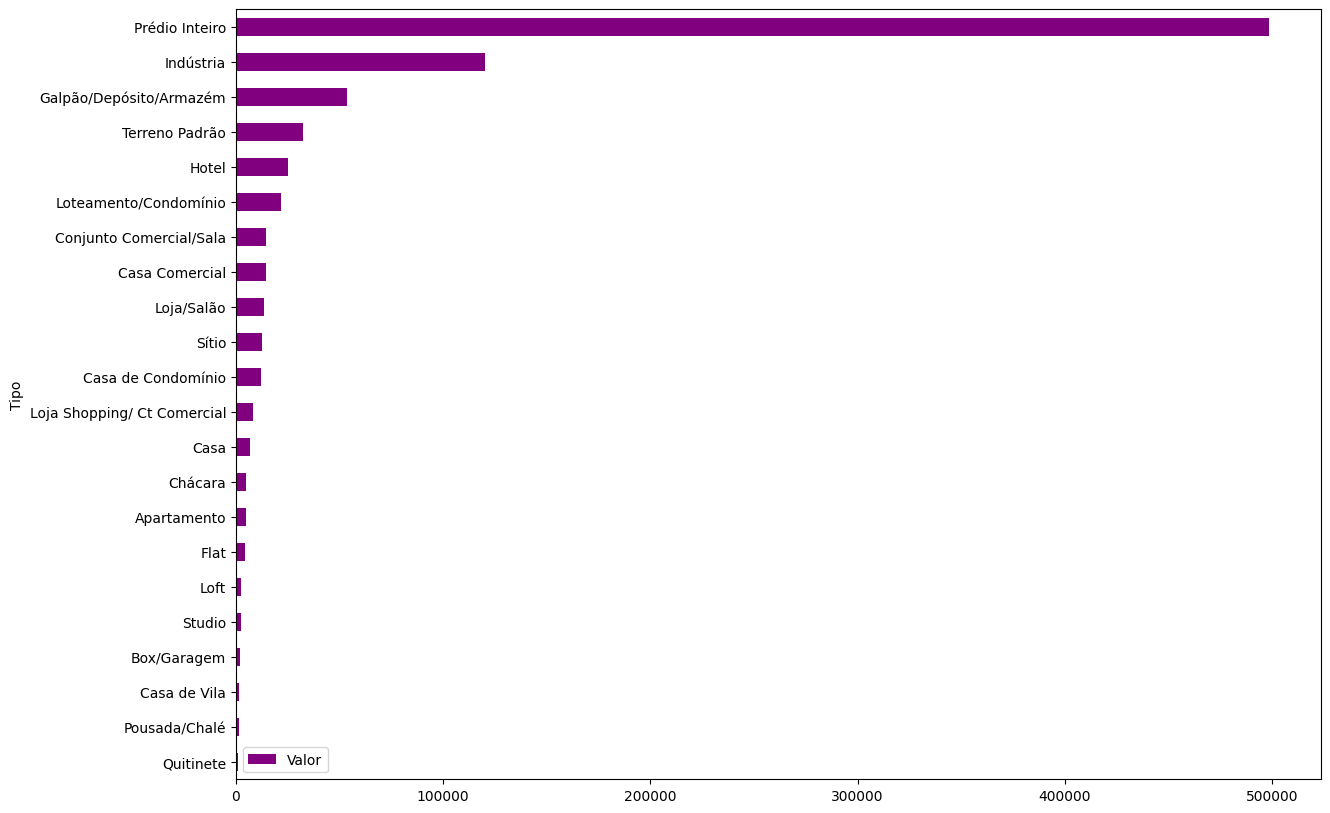

In [79]:
# plotando o gráfico de barras horizontais
# kind='barh'
# figsize=(14,10) - largura e altura do gráfico
# pixels - 1400 px de largura e 1000 px de altura
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

🏡 Decisão Estratégica: Segmentação da Base de Dados
Após a Análise Exploratória de Dados (AED), notamos uma variação significativa nos preços médios dos aluguéis quando agrupados por Tipo de imóvel.

🚨 O Problema: Mistura de Imóveis Residenciais e Comerciais
A disparidade de valores não é um erro nos dados, mas sim um reflexo de categorias fundamentalmente distintas na mesma base:

Imóveis Residenciais: Apartamentos, Casas, Quitinetes, etc.
Imóveis Comerciais: Conjunto Comercial/Sala, Hotéis, etc.
📉 Impacto no Modelo de Machine Learning (ML)
Misturar essas categorias na mesma base para um único modelo de precificação compromete drasticamente o aprendizado:

Performance Fraca: O modelo terá dificuldade em aprender padrões específicos, resultando em um "meio-termo" que não precifica bem nem imóveis residenciais, nem comerciais.
Diferença de Features: As variáveis que influenciam o preço são exclusivas para cada tipo:
Residencial: Número de quartos, vagas de garagem, área de lazer.
Comercial: Localização comercial, fluxo de pessoas, estrutura para negócios.
✨ Solução Proposta: Segmentação da Base
A melhor prática é segmentar a base de dados em duas partes distintas.

Tipo de Base	Objetivo	Benefício para o ML
Residencial	Precificação de Aluguéis para Moradia.	Permite a criação de um modelo especializado e mais preciso.
Comercial	Análise e Precificação para Negócios.	Utiliza features específicas e relevantes, otimizando o aprendizado.
📌 Conclusão: Esta segmentação é uma etapa de limpeza de dados e *feature engineering*** que atende diretamente às **Demandas de ML do nosso Trello, garantindo dados de alta qualidade para o treinamento dos modelos.

## Removendo os imóveis comerciais

In [17]:
# Para visualizarmos os tipos únicos presentes nessa coluna
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [19]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32943, dtype: object

In [20]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0


In [21]:
# crie uma lista com os tipos comerciais
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [22]:
# filtre o DataFrame dados retornando apenas os imóveis comerciais
df.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,0.0,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,0.0
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,0.0
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,0.0
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,0.0,0.0


In [23]:
df.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [25]:
df = df.query('@imoveis_comerciais not in Tipo')


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [36]:
df['Tipo']

0          Quitinete
1               Casa
3        Apartamento
4        Apartamento
5        Apartamento
            ...     
32953    Apartamento
32955      Quitinete
32956    Apartamento
32957    Apartamento
32958    Apartamento
Name: Tipo, Length: 23102, dtype: object

In [37]:
df['Tipo'].value_counts()


Tipo
Apartamento           19525
Casa de Condomínio      996
Casa                    965
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [38]:
df['Tipo'].value_counts(normalize=True)


Tipo
Apartamento           0.845165
Casa de Condomínio    0.043113
Casa                  0.041771
Quitinete             0.036187
Flat                  0.020604
Casa de Vila          0.010778
Loft                  0.002208
Studio                0.000173
Name: proportion, dtype: float64

In [39]:
type(df['Tipo'].value_counts(normalize=True))


pandas.core.series.Series

In [44]:
df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845165
Casa,0.041771
Casa de Condomínio,0.043113
Casa de Vila,0.010778
Flat,0.020604
Loft,0.002208
Quitinete,0.036187
Studio,0.000173


In [43]:
df_percentual_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('proportion')

In [42]:
df_percentual_tipo

,proportion
Tipo,
Studio,0.000173
Loft,0.002208
Casa de Vila,0.010778
Flat,0.020604
Quitinete,0.036187
Casa,0.041771
Casa de Condomínio,0.043113
Apartamento,0.845165


In [45]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [46]:
df.Tipo.value_counts()

Tipo
Apartamento           19525
Casa de Condomínio      996
Casa                    965
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

### **Selecionando apenas os imóveis do tipo apartamento**

In [47]:
df.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845165
Casa de Condomínio    0.043113
Casa                  0.041771
Quitinete             0.036187
Flat                  0.020604
Casa de Vila          0.010778
Loft                  0.002208
Studio                0.000173
Name: proportion, dtype: float64

In [48]:
df.Tipo.value_counts(normalize=True).to_frame()

,proportion
Tipo,
Apartamento,0.845165
Casa de Condomínio,0.043113
Casa,0.041771
Quitinete,0.036187
Flat,0.020604
Casa de Vila,0.010778
Loft,0.002208
Studio,0.000173


In [49]:
df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845165
Casa,0.041771
Casa de Condomínio,0.043113
Casa de Vila,0.010778
Flat,0.020604
Loft,0.002208
Quitinete,0.036187
Studio,0.000173


In [50]:
df.shape

(23102, 9)

In [51]:
df_percentual_tipo.shape

(8, 1)

In [52]:
df_percentual_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

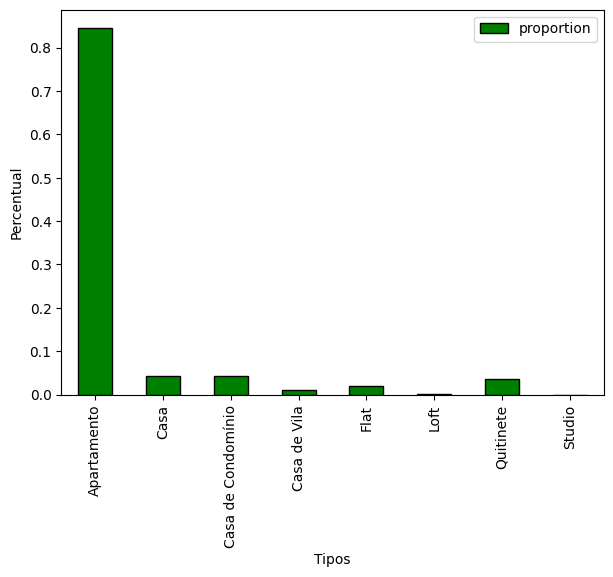

In [55]:
df_percentual_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

df_percentual_tipo.plot(kind='bar', figsize=(7, 5), color ='green', edgecolor='black',
                        xlabel = 'Tipos', ylabel = 'Percentual');

# Tratando e filtrando os dados

## Lidando com dados nulos

## Removendo registros

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas